# Preparing GPR images for image segmentation

Dongfang Qu, University of Copenhagen

## 1. Convert to grayscale and save images to file

In [11]:
from PIL import Image
#load the image, and convert to grayscale
gs_gpr = Image.open('gpr.jpeg').convert(mode = 'L')
gs_mask = Image.open('mask.jpeg').convert(mode = 'L')
#save in jpg format
gs_gpr.save('gpr_gs.jpg')
gs_mask.save('mask_gs.jpg')

## 2. Flip image

In [24]:
gpr_gs_flip = Image.open('gpr_gs.jpg').transpose(Image.FLIP_LEFT_RIGHT)
mask_gs_flip = Image.open('mask_gs.jpg').transpose(Image.FLIP_LEFT_RIGHT)
gpr_gs_flip.save('gpr_gs_flip.jpg')
mask_gs_flip.save('mask_gs_flip.jpg')

## 3. Load greyscale images as pixel array

uint8
(368, 489)
uint8
(369, 492)


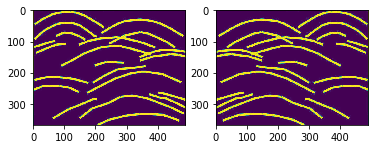

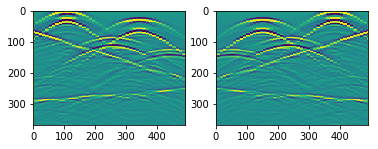

In [28]:
# use this with Pillow installed
from matplotlib import image
from matplotlib import pyplot as plt
# load image as pixel array
mask_1 = image.imread('mask_gs.jpg')
gpr_1 = image.imread('gpr_gs.jpg')
mask_2 = image.imread('mask_gs_flip.jpg')
gpr_2 = image.imread('gpr_gs_flip.jpg')
print(mask_1.dtype)
print(mask_1.shape)
print(gpr_1.dtype)
print(gpr_1.shape)
#display the array of pixels as an image
plt.subplot(121)
plt.imshow(mask_1)
plt.subplot(122)
plt.imshow(mask_2)
plt.show()
plt.subplot(121)
plt.imshow(gpr_1)
plt.subplot(122)
plt.imshow(gpr_2)
plt.show()

## 4. Generate patches

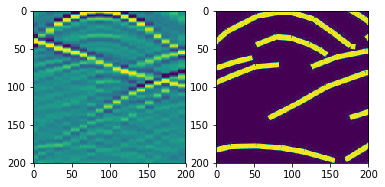

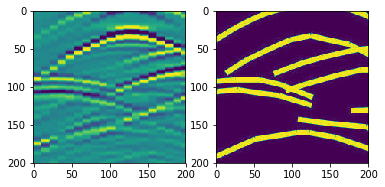

In [34]:
from sklearn.feature_extraction import image
patches_gpr_1 = image.extract_patches_2d(gpr_1, (200, 200),25, random_state = 1)
patches_gpr_2 = image.extract_patches_2d(gpr_2, (200, 200),25, random_state = 1)
patches_mask_1 = image.extract_patches_2d(mask_1, (200, 200),25, random_state = 1)
patches_mask_2 = image.extract_patches_2d(mask_2, (200, 200),25, random_state = 1)
plt.subplot(121)
plt.imshow(patches_gpr_1[0])
plt.subplot(122)
plt.imshow(patches_mask_1[0])
plt.show()
plt.subplot(121)
plt.imshow(patches_gpr_2[0])
plt.subplot(122)
plt.imshow(patches_mask_2[0])
plt.show()


## 5. Save patches to file

In [52]:
#remember to change'g2_' every time
def save_patches(patches):
    for i in range(len(patches)):
        name = 'm2_' + str(i)+'.jpg'
        Image.fromarray(patches[i]).save(name)
save_patches(patches_mask_2)        

## 6. Prepare new image 

In [2]:
from PIL import Image
#load the image, and convert to grayscaleg
gpr_full_grey= Image.open('./data/gpr_full.png').convert(mode = 'L')
#save in jpg format
gpr_full_grey.save('gpr_full_grey.jpg')

In [5]:
#split the image to two squares, the dimension should be multiples of 32.
from PIL import Image
image = Image.open('./data/gpr_full_grey.jpg')
cropped_1 = image.crop((0, 0, 330, 316))
cropped_2 = image.crop((331, 0, 661, 316))
cropped_1.show()
cropped_2.show()
cropped_1.save('cropped_1.jpg')
cropped_2.save('cropped_2.jpg')

### References
https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/